<a href="https://colab.research.google.com/github/AurelioGuilherme/DNC_projetos/blob/main/PROJETOS_PRATICOS/walmart_deliverable_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aurélio Guilherme dos Santos Silva

RID 33971

# 1. infos do projeto

* **Contextualização**

Você foi contratado pelo Wallmart para fazer um levantamento do faturamento das lojas nos USA e apontar qual loja seria melhor para expandir seu tamanho. ​

É preciso analisar as vendas semanais de cada loja, calcular algumas informações importantes que serão perguntadas e ao final de tudo, indicar em qual loja deva ser investida.​

* **Wallmart Inc.**

Walmart, Inc., é uma multinacional estadunidense de lojas de departamento. ​

A companhia foi fundada por Sam Walton em 1962, incorporada em 31 de outubro de 1969 e feita capital aberto na New York Stock Exchange, em 1972. ​

No ano de 2021, obteve um lucro de $13.51 Bilhões.​

Sendo uma das principais lojas de varejo do mundo, os dados contemplam as vendas semanais de 45 lojas espalhadas pelos Estados Unidos. ​

O Walmart realiza vários eventos promocionais de descontos ao longo do ano. ​

Essas remarcações precedem feriados importantes, os quatro maiores de todos, que são o Super Bowl, o Dia do Trabalho, o Dia de Ação de Graças e o Natal. ​

As semanas que incluem esses feriados têm um peso maior.

* **Sobre os Dados**

Dataset: https://www.kaggle.com/yasserh/walmart-dataset

Os dados apresentam as vendas semanais de 05/02/10 até 01/11/12 em 45 lojas varejistas da rede Wallmart e também algumas métricas econômicas e meteriológicas por semana. A descrição destas características estão abaixo:


**Holiday Events​ |     Semanas​**

Super Bowl​     | 12-Feb-10, 11-Feb-11, 10-Feb-12​

Labour Day​     | 10-Sep-10, 09-Sep-11, 07-Sep-12​

Thanksgiving​   | 26-Nov-10, 25-Nov-11, 23-Nov-12​

Christmas​      | 31-Dec-10, 30-Dec-11, 28-Dec-12​




**Variável​ - Descrição​**

Store​ - Número da Loja​

Date​ - Semana de Venda​

Weekly_Sales​ - Venda Naquela Semana​

Holiday_Flag​  - Flag se é ou não semana com feriado (1 - Holiday Week 0 - Non-Holiday Week)​

Temperature​ - Temperatura do dia em °F​

Fuel_Price​ - Preço do combustível na região da loja​

CPI​ - Índice de preços ao consumidor​

Unemployment​ - Taxa de desemprego​



#2. Projeto

## 2.1 leitura dos dados


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Walmart.csv')

In [ ]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.900,0,42.310,2.572,211.096,8.106
1,1,12-02-2010,1641957.440,1,38.510,2.548,211.242,8.106
2,1,19-02-2010,1611968.170,0,39.930,2.514,211.289,8.106
3,1,26-02-2010,1409727.590,0,46.630,2.561,211.320,8.106
4,1,05-03-2010,1554806.680,0,46.500,2.625,211.350,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.950,0,64.880,3.997,192.014,8.684
6431,45,05-10-2012,733455.070,0,64.890,3.985,192.170,8.667
6432,45,12-10-2012,734464.360,0,54.470,4.000,192.327,8.667
6433,45,19-10-2012,718125.530,0,56.470,3.969,192.331,8.667


In [ ]:
df['Store'].value_counts()

1     143
24    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
25    143
23    143
2     143
22    143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
45    143
Name: Store, dtype: int64

In [ ]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Usando o metodo info verifiquei que é necessario tratamento de algumas colunas, por exemplo a coluna correspondente as datas não estão apropriadamente formatadas com o formato de data, portanto é necessario transformação para destes dados para assim melhor manipula-los 

A coluna de temperatura está em graus fahrenheit, para melhor visualizão e exploração de datos farei a conversão para graus celsius.

In [ ]:
df.min()

Store                    1
Date            01-04-2011
Weekly_Sales     209986.25
Holiday_Flag             0
Temperature          -2.06
Fuel_Price           2.472
CPI                126.064
Unemployment         3.879
dtype: object

In [ ]:
df.max()

Store                   45
Date            31-12-2010
Weekly_Sales    3818686.45
Holiday_Flag             1
Temperature         100.14
Fuel_Price           4.468
CPI             227.232807
Unemployment        14.313
dtype: object

In [ ]:
print(df.isnull().sum())

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


Não há dados nulos no dataframe.

In [ ]:
pd.set_option('float_format', '{:.3f}'.format)
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000,6435.000,6435.000,6435.000,6435.000,6435.000,6435.000
mean,23.000,1046964.878,0.070,60.664,3.359,171.578,7.999
std,12.988,564366.622,0.255,18.445,0.459,39.357,1.876
min,1.000,209986.250,0.000,-2.060,2.472,126.064,3.879
25%,12.000,553350.105,0.000,47.460,2.933,131.735,6.891
50%,23.000,960746.040,0.000,62.670,3.445,182.617,7.874
75%,34.000,1420158.660,0.000,74.940,3.735,212.743,8.622
max,45.000,3818686.450,1.000,100.140,4.468,227.233,14.313


## 3. Correção de dados

### 3.1 Datas.

Para corrigir o formato das datas decidi converter para um formato data e separar por culunas dentro do meu dataframe com as colunas correspondente as datas.

In [ ]:
df['Date']=pd.to_datetime(df.Date, format = "%d-%m-%Y")
df['Mes'] = df['Date'].dt.month
df['Ano'] = df['Date'].dt.year

In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Mes,Ano
0,1,2010-02-05,1643690.900,0,42.310,2.572,211.096,8.106,2,2010
1,1,2010-02-12,1641957.440,1,38.510,2.548,211.242,8.106,2,2010
2,1,2010-02-19,1611968.170,0,39.930,2.514,211.289,8.106,2,2010
3,1,2010-02-26,1409727.590,0,46.630,2.561,211.320,8.106,2,2010
4,1,2010-03-05,1554806.680,0,46.500,2.625,211.350,8.106,3,2010


### 3.2 Temperatura

In [ ]:
df['Temperature'] = ((df['Temperature'] - 32) / 1.8)

In [ ]:
df[['Temperature']]

,Temperature
0,5.728
1,3.617
2,4.406
3,8.128
4,8.056
...,...
6430,18.267
6431,18.272
6432,12.483
6433,13.594


##3.3. Outliers

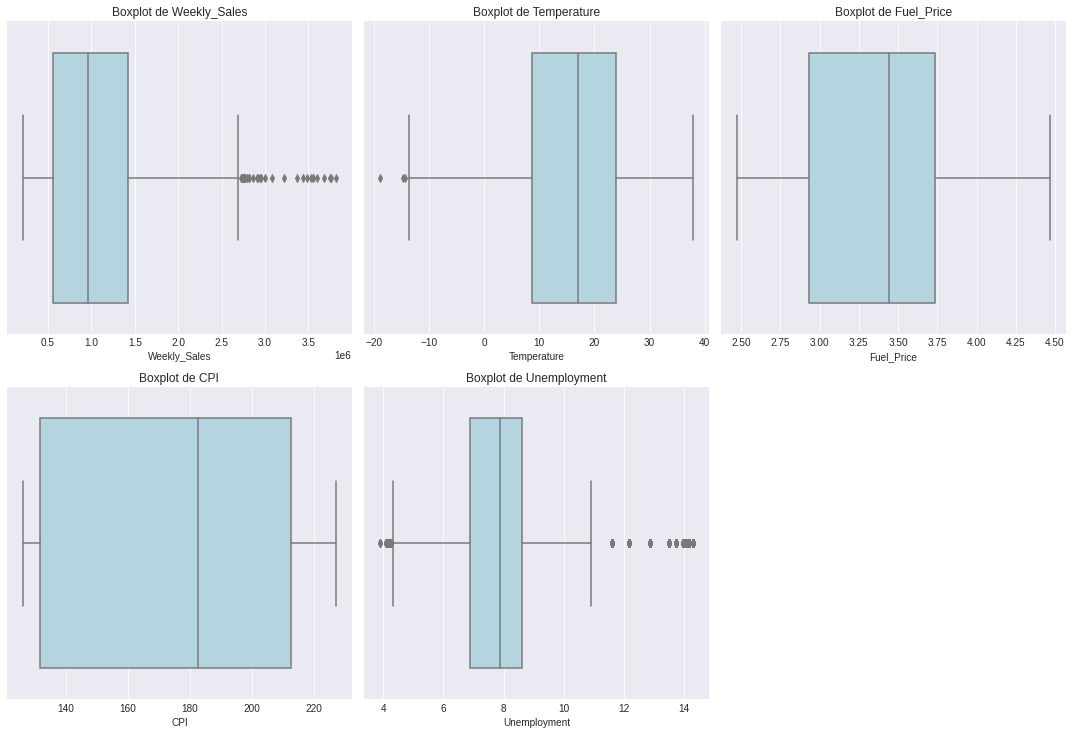

In [ ]:
df_Outliers=df[['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']]

#Checar outliers
plt.figure(figsize=(15,15))
list_of_column=df_Outliers.columns # colunas a serem plotadas os gráficos

for i in range(len(list_of_column)):  # loop para plotar grafáficos boxplot
    plt.subplot(3,3,i+1)
    sns.boxplot(x = df_Outliers[list_of_column[i]],data=df_Outliers,color='lightblue')
    plt.title('Boxplot de {}'.format(list_of_column[i])) 
    plt.tight_layout()

A coluna correspondente as vendas semanais embora apresente no gráfico acima valores outliers, não devemos considerar esses dados como discrepantes, ou com erros, pois existem sazionalidades que acarretam em um maior numero de vendas.
Porem  a coluna correspondente ao indice de desemprego apresentou outliers.

In [ ]:
# Função que retorna valores outliers superiors e inferior

def outlier(x):
  ''' A função retornara os valores considerados outliers inferiores e superiores
    x = valor que deseja descobrir
    quartil_75 = retorna o quartil 75%
    quartil_25 = retorna o quartil 25%
    outlier é a diferença de 1,5 vezes a diferença do amplitude
    interquantil
    C = constante
      ''' 
  quartil_75 = np.quantile(x,0.75)
  quartil_25 = np.quantile(x,0.25)
  c = 1.5
  intervalo_Interquartil =  quartil_75 - quartil_25
  outlier_Sup = quartil_75 + (c * intervalo_Interquartil)
  outlier_Inf = quartil_25 - (c * intervalo_Interquartil)
  return outlier_Inf,outlier_Sup

In [ ]:
outlier(df.Unemployment)

(4.2945, 11.218499999999999)

In [ ]:
outliers = df[(df['Unemployment'] > 11.218499999999999) |  (df['Unemployment'] < 4.2945)]

In [ ]:
outliers.groupby(['Store'])['Unemployment'].count()

Store
4      17
12    126
23     43
28    126
38    126
40     43
Name: Unemployment, dtype: int64

In [ ]:
outliers.groupby(['Ano'])['Unemployment'].count()

Ano
2010    144
2011    156
2012    181
Name: Unemployment, dtype: int64

Analisando os valores agrupados concluí que não devemos tratar como outlier, os dados mostram que em 6 das 45 lojas houveram semanas em que a taxa de desemprego regional foi fora do padrão.
Seria necessario verificar a localização das lojas para mais detalhamento.

#4. Correlação

Para verificar a correlação decidi fazer 3 análises em que dividirei os dados das seguintes formas:
* Correlação global, sem qualquer alteração no dataframe
* Correlação das semanas com feriado.
* Correlação das semanas sem os feriados.

## 4.1. Correlação global, sem qualquer alteração no dataframe

In [ ]:
correlacao_df = df[['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment','Mes','Ano','Holiday_Flag']].corr()
correlacao_df

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Mes,Ano,Holiday_Flag
Weekly_Sales,1.000,-0.064,0.009,-0.073,-0.106,0.076,-0.018,0.037
Temperature,-0.064,1.000,0.145,0.177,0.101,0.236,0.064,-0.155
Fuel_Price,0.009,0.145,1.000,-0.171,-0.035,-0.042,0.779,-0.078
CPI,-0.073,0.177,-0.171,1.000,-0.302,0.005,0.075,-0.002
Unemployment,-0.106,0.101,-0.035,-0.302,1.000,-0.013,-0.242,0.011
Mes,0.076,0.236,-0.042,0.005,-0.013,1.000,-0.194,0.123
Ano,-0.018,0.064,0.779,0.075,-0.242,-0.194,1.000,-0.057
Holiday_Flag,0.037,-0.155,-0.078,-0.002,0.011,0.123,-0.057,1.000


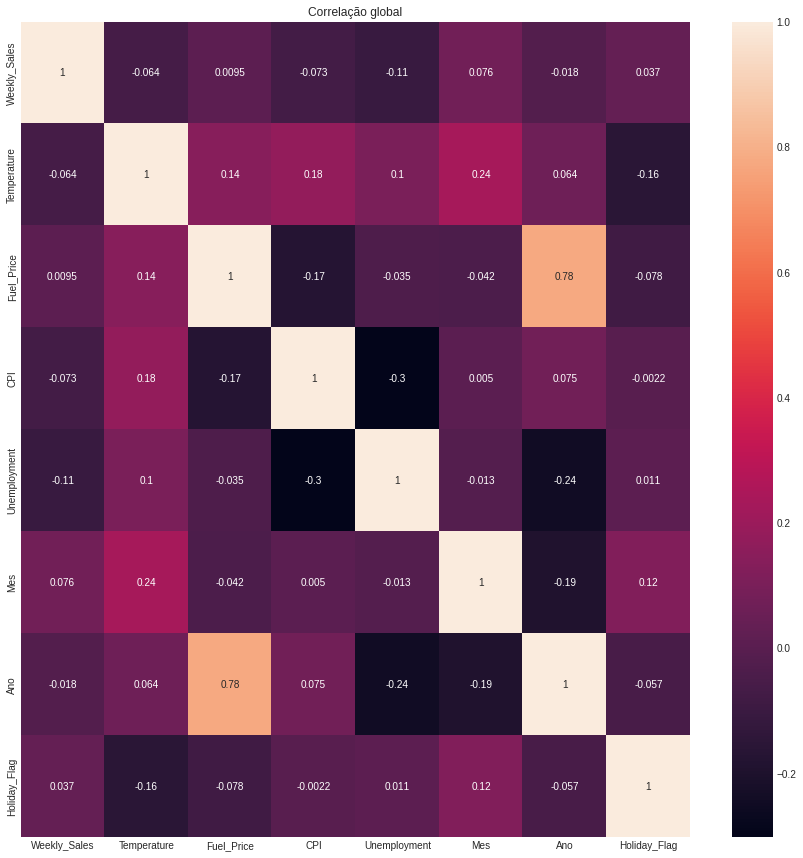

In [ ]:
plt.figure(figsize=(15,15))
plt.title('Correlação global')
sns.heatmap(correlacao_df,annot=True);

## 4.2. Correlação das semanas com feriado.

Separei o dataframe utilizando um filtro na coluna correspondente aos feriados.

In [ ]:
feriado = df.query('Holiday_Flag ==  1').copy()

In [ ]:
correlacao_feriado = feriado[['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment','Mes','Ano']].corr()
correlacao_feriado

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Mes,Ano
Weekly_Sales,1.000,-0.039,0.046,-0.081,-0.097,0.053,-0.004
Temperature,-0.039,1.000,0.302,0.171,0.083,0.284,0.180
Fuel_Price,0.046,0.302,1.000,-0.204,-0.034,0.102,0.793
CPI,-0.081,0.171,-0.204,1.000,-0.300,0.008,0.068
Unemployment,-0.097,0.083,-0.034,-0.300,1.000,-0.010,-0.221
Mes,0.053,0.284,0.102,0.008,-0.010,1.000,-0.240
Ano,-0.004,0.180,0.793,0.068,-0.221,-0.240,1.000


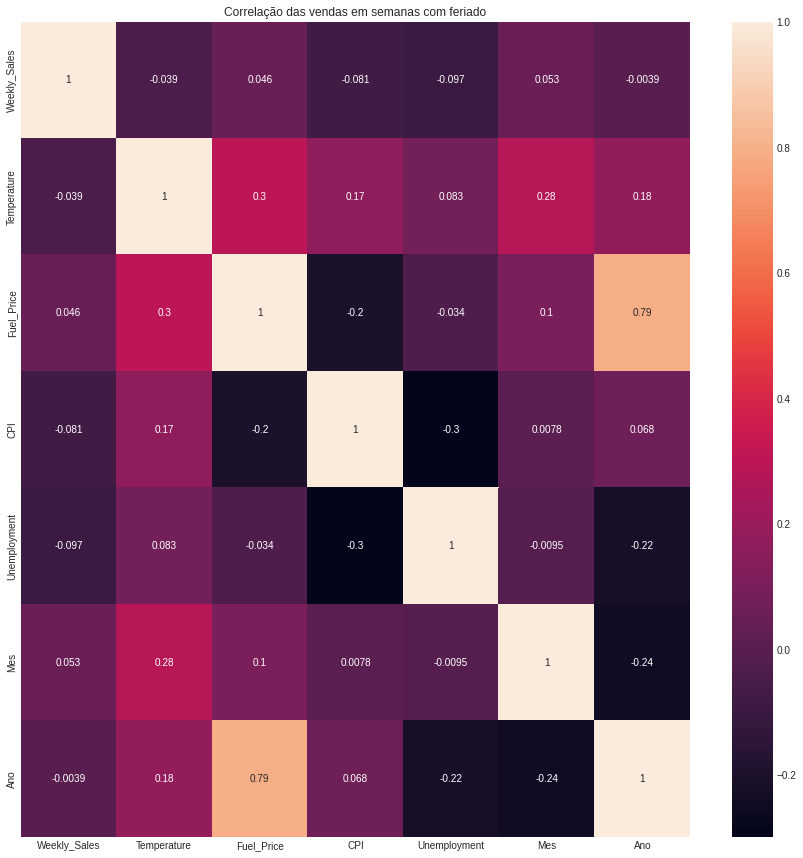

In [ ]:
plt.figure(figsize=(15,15))
plt.title('Correlação das vendas em semanas com feriado')
sns.heatmap(correlacao_feriado,annot=True);

## 4.3. Correlção nas vendas das semanas sem os feriados.





In [ ]:
semanas_Normais = df.query('Holiday_Flag ==  0').copy()

In [ ]:
correlacao_semanas_Normais = semanas_Normais[['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment','Mes','Ano']].corr()
correlacao_semanas_Normais

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Mes,Ano
Weekly_Sales,1.000,-0.061,0.010,-0.072,-0.108,0.074,-0.017
Temperature,-0.061,1.000,0.123,0.179,0.106,0.258,0.047
Fuel_Price,0.010,0.123,1.000,-0.169,-0.034,-0.044,0.778
CPI,-0.072,0.179,-0.169,1.000,-0.302,0.005,0.075
Unemployment,-0.108,0.106,-0.034,-0.302,1.000,-0.015,-0.243
Mes,0.074,0.258,-0.044,0.005,-0.015,1.000,-0.185
Ano,-0.017,0.047,0.778,0.075,-0.243,-0.185,1.000


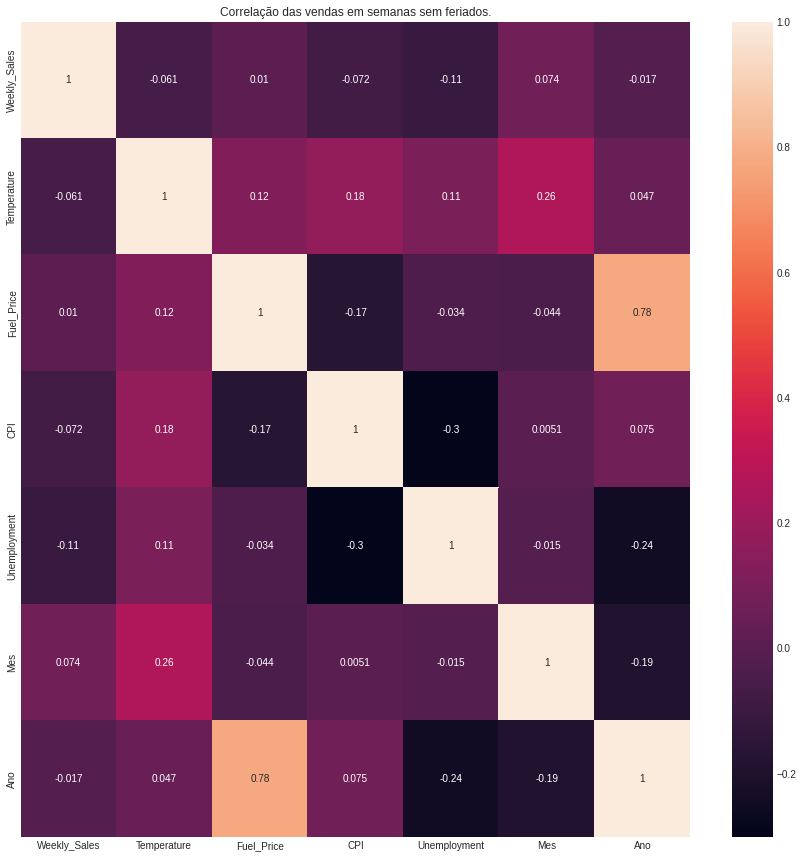

In [ ]:
plt.figure(figsize=(15,15))
plt.title('Correlação das vendas em semanas sem feriados.')
sns.heatmap(correlacao_semanas_Normais,annot=True);

Não há correlação significativa e não tem difereça significativa na correlação comparando as vendas semanais de semanas com e sem feriado.

Entretanto nota-se uma correlação forte no preço do combustivel com o ano, porem não é relevante para nossa análise.

# 5 Análise exploratória.

Com o metodo de agrupamento (groupby), busco análisar a média e o total de vendas por loja.

### 5.1 Vendas totais.

In [ ]:
df_agg = df.groupby(['Store'])['Weekly_Sales'].sum().sort_values(ascending=False)
df_agg = pd.DataFrame(df_agg)
df_agg.head(5)

,Weekly_Sales
Store,
20,301397792.460
4,299543953.380
14,288999911.340
13,286517703.800
2,275382440.980


In [ ]:
# Alterando o padrão visual dos gráficos
plt.style.use('seaborn-darkgrid')

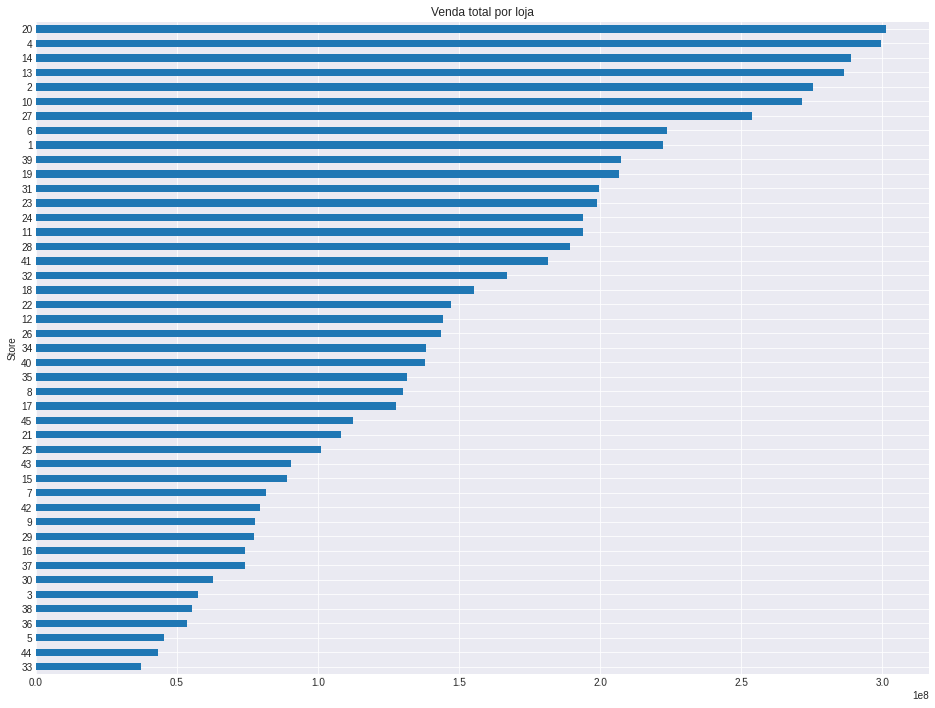

In [ ]:
df_agg['Weekly_Sales'].plot(kind='barh',figsize=(16,12)).invert_yaxis()
plt.title('Venda total por loja')
plt.xticks(rotation = 1)
plt.show()

###5.2. Média de vendas semanais.

In [ ]:
df_agg = df.groupby(['Store'])['Weekly_Sales'].mean().sort_values(ascending=False)
df_agg = pd.DataFrame(df_agg)
df_agg.head()

,Weekly_Sales
Store,
20,2107676.870
4,2094712.961
14,2020978.401
13,2003620.306
2,1925751.336


Para identificar as lojas com melhores médias de vendas semanais, usei o metodo describe para identificar os percentis de 25%,50% e 75% 

In [ ]:
df_agg.describe()

,Weekly_Sales
count,45.000
mean,1046964.878
std,546626.269
min,259861.692
25%,556403.863
50%,966781.559
75%,1395901.437
max,2107676.870


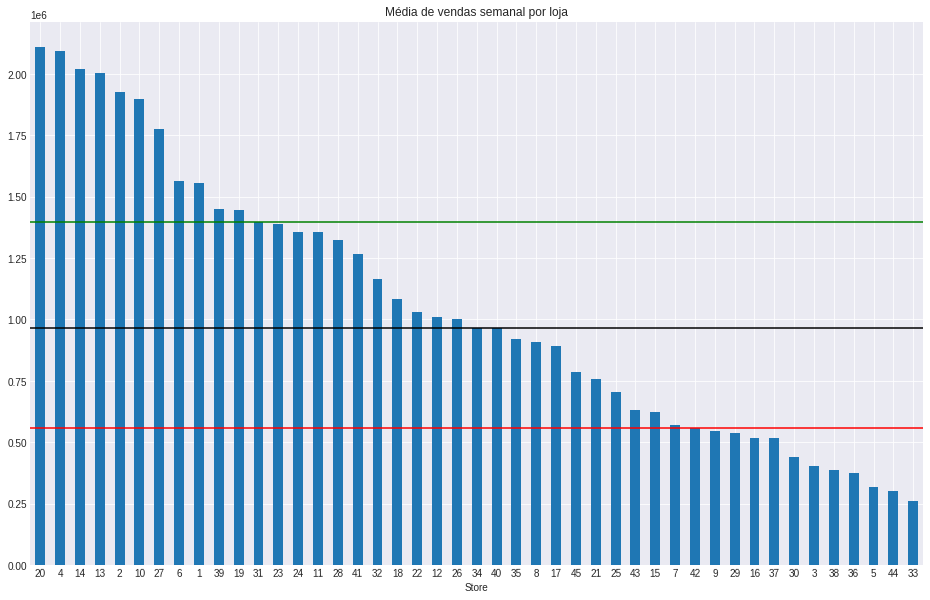

In [ ]:
# plot de gráfico da venda semanal média por loja
df_agg['Weekly_Sales'].plot(kind='bar',figsize=(16,10))
plt.title('Média de vendas semanal por loja')
plt.xticks(rotation = 1)
plt.axhline(y=556403.863,color = 'red')  # percentil 25%
plt.axhline(y=966781.559,color = 'black')  # percentil 50%
plt.axhline(y=1395901.437,color = 'green')  # percentil 75%
plt.show()

Conclui-se que existem 12 lojas com valores de vendas médios e acumulados sobressalentes das demais (média de vendas semanais superior ao percentil 75%), portanto verificarei quais as caracteristicas destas lojas, como média de temperatura, preço de combustivel, desemprego e preço médio dos produtos.

In [ ]:
df_agg.head(12)

,Weekly_Sales
Store,
20,2107676.870
4,2094712.961
14,2020978.401
13,2003620.306
2,1925751.336
10,1899424.573
27,1775216.202
6,1564728.186
1,1555264.398


# 6. Melhores lojas

## 6.1 Vendas máximas, mínimas e médias das lojas

In [ ]:
# Utilizei um groupby por loja, defini média,total e maxima com um pd.NamedAgg para conseguir utilizar um sort_values()


df_agg = df.groupby(['Store']).agg(media = pd.NamedAgg (column = 'Weekly_Sales',aggfunc = 'mean'), 
                                   total = pd.NamedAgg (column = 'Weekly_Sales',aggfunc = 'sum'),
                                   max = pd.NamedAgg (column = 'Weekly_Sales',aggfunc = 'max'))

### 6.1.1 Lojas com maior e menor faturamento total no período.

In [ ]:
# Maior faturamento
df_agg.sort_values('total',ascending=False).head(1)

,media,total,max,min
Store,,,,
20,2107676.870,301397792.460,3766687.430,1761016.510


In [ ]:
# Menor faturamento
df_agg.sort_values('total',ascending=False).tail(1)

,media,total,max,min
Store,,,,
33,259861.692,37160221.960,331173.510,209986.250


### 6.1.2 Lojas com maior e menor média de faturamento.

In [ ]:
# Maior média de faturamento
df_agg.sort_values('media',ascending=False).head(1)

,media,total,max,min
Store,,,,
20,2107676.870,301397792.460,3766687.430,1761016.510


In [ ]:
# Menor média de faturamento
df_agg.sort_values('media',ascending=False).tail(1)

,media,total,max,min
Store,,,,
33,259861.692,37160221.960,331173.510,209986.250


### 6.1.3 Lojas coim maior e menor faturamento semanal

In [ ]:
# Maior faturamento semanal
df_agg.sort_values('max',ascending=False).head(1)

,media,total,max,min
Store,,,,
14,2020978.401,288999911.340,3818686.450,1479514.660


In [ ]:
# Menor faturamento semanal
df_agg.sort_values('max',ascending=False).tail(1)

,media,total,max,min
Store,,,,
33,259861.692,37160221.960,331173.510,209986.250


## 6.2 Verificando quantas semanas do ano a loja com maior faturamento médio semanal, ultrapassou a média de faturamento semanal total

In [ ]:
loja_20 = df.query('Store == 20').copy()
media = df['Weekly_Sales'].mean()

In [ ]:
loja_20[loja_20['Weekly_Sales'] > media]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Mes,Ano
2717,20,2010-02-05,2401395.470,0,-3.378,2.784,204.247,8.187,2,2010
2718,20,2010-02-12,2109107.900,1,-5.489,2.773,204.386,8.187,2,2010
2719,20,2010-02-19,2161549.760,0,-3.650,2.745,204.432,8.187,2,2010
2720,20,2010-02-26,1898193.950,0,0.178,2.754,204.463,8.187,2,2010
2721,20,2010-03-05,2119213.720,0,-0.139,2.777,204.494,8.187,3,2010
...,...,...,...,...,...,...,...,...,...,...
2855,20,2012-09-28,2008350.580,0,14.806,3.997,215.737,7.280,9,2012
2856,20,2012-10-05,2246411.890,0,15.983,3.985,215.926,7.293,10,2012
2857,20,2012-10-12,2162951.360,0,8.444,4.000,216.115,7.293,10,2012
2858,20,2012-10-19,1999363.490,0,13.478,3.969,216.146,7.293,10,2012


A loja 20 esteve acíma do faturamento médio de todas as lojas durante todo o período, 143 semanas.

# 6.3 Impacto dos feriados nas vendas.

In [ ]:
media_Feriado = feriado['Weekly_Sales'].mean()
impacto = media_Feriado - media
impacto

75923.01479378412

O faturamento médio aumenta em U$ 75.923,01 nos feriados.

## 6.4 Definindo as melhores lojas

Criei um dataframe com as lojas identificadas como melhores

In [ ]:
melhores_lojas = df.query('Store ==  [20,4,14,13,2,10,27,6,1,39,19,31]').copy()
melhores_lojas

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Mes,Ano
0,1,2010-02-05,1643690.900,0,5.728,2.572,211.096,8.106,2,2010
1,1,2010-02-12,1641957.440,1,3.617,2.548,211.242,8.106,2,2010
2,1,2010-02-19,1611968.170,0,4.406,2.514,211.289,8.106,2,2010
3,1,2010-02-26,1409727.590,0,8.128,2.561,211.320,8.106,2,2010
4,1,2010-03-05,1554806.680,0,8.056,2.625,211.350,8.106,3,2010
...,...,...,...,...,...,...,...,...,...,...
5572,39,2012-09-28,1495607.070,0,25.578,3.666,221.656,6.623,9,2012
5573,39,2012-10-05,1574408.670,0,22.250,3.617,221.853,6.228,10,2012
5574,39,2012-10-12,1494417.070,0,21.044,3.601,222.051,6.228,10,2012
5575,39,2012-10-19,1577486.330,0,21.917,3.594,222.095,6.228,10,2012


In [ ]:
melhores_lojas[['Temperature','Fuel_Price','CPI','Unemployment']].mean()

Temperature     17.255
Fuel_Price       3.347
CPI            177.920
Unemployment     7.557
dtype: float64

In [ ]:
melhores_lojas.groupby(['Store'])['CPI'].mean().sort_values().head(10)

Store
4    128.680
10   128.680
13   128.680
19   135.093
27   139.011
14   186.286
20   209.038
39   214.729
2    215.646
31   215.646
Name: CPI, dtype: float64

In [ ]:
melhores_lojas.groupby(['Store'])['Fuel_Price'].mean().sort_values().head(10)

Store
4    3.217
1    3.220
2    3.220
6    3.220
31   3.220
39   3.220
13   3.286
14   3.418
20   3.418
10   3.576
Name: Fuel_Price, dtype: float64

In [ ]:
melhores_lojas.groupby(['Store'])['Unemployment'].mean().sort_values().head(10)

Store
4    5.965
6    6.607
13   7.002
20   7.371
1    7.610
2    7.624
31   7.624
39   7.869
19   7.996
27   8.002
Name: Unemployment, dtype: float64

Embora a correlação presente no dataframe é praticamente nula, verificou-se um padrão, a segunda loja com melhor media de vendas, possui os indices médios mais baixos entre taxa de desemprego,indices de preços, e preços de combustiveis.

#7. Loja a ser investida.

Criei outro dataframe com as demais lojas.

In [ ]:
lojas = df.query('Store !=  [20,4,14,13,2,10,27,6,1,39,19,31]').copy()

Verificando as médias dos indices de preço, e taxa de desemprego média regional.

In [ ]:
lojas.groupby(['Store'])['CPI'].mean().sort_values().head(10)

Store
33   128.680
17   128.680
28   128.680
12   128.680
34   128.680
44   128.680
38   128.680
42   128.680
15   135.093
40   135.093
Name: CPI, dtype: float64

In [ ]:
lojas.groupby(['Store'])['Unemployment'].mean().sort_values().head(10)

Store
40   4.796
23   4.796
8    6.092
9    6.100
5    6.295
16   6.478
17   6.549
44   6.736
41   6.973
3    7.177
Name: Unemployment, dtype: float64

Verificou-se que a loja 17 tem o segundo melhor indice de preços e setimo menor indice de taxa de desemprego entre as lojas que não estão entre os 75% + no melhor faturamento médio.

Então a melhor loja para se investir é a loja 17.

Porem ressalto a necessidade de mais dados para consolidar a análise, dados como a localização, população regional e tamanho da loja são dados relevantes a serem apurados quando se trata de expansão de uma loja, por exemplo a loja com maior faturamento é a loja 20, mas ela não possui as melhores médias entre os indices de desemprego, ou preços, talves seja pela localização, acesso a loja, tamanho da loja, entre outras variáveis que a tornam a loja com melhor faturamento.